# Subject

We will use here the same data set as for practice #3.

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [24]:
data = pd.read_csv("data/FuelConsumption.csv")

In [25]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
716,2014,MAZDA,MAZDA6,MID-SIZE,2.5,4,M6,X,9.4,6.4,8.1,35,186
203,2014,CHEVROLET,CRUZE ECO,MID-SIZE,1.4,4,M6,X,8.4,5.6,7.1,40,163
566,2014,JAGUAR,XKR COUPE,MINICOMPACT,5.0,8,AS6,Z,15.6,10.9,13.5,21,310
232,2014,CHEVROLET,IMPALA ECO,FULL-SIZE,2.4,4,AS6,X,10.0,7.0,8.7,32,200
331,2014,DODGE,JOURNEY FFV,SUV - SMALL,3.6,6,A6,E,18.9,12.9,16.2,17,259
945,2014,SUBARU,FORESTER AWD,SUV - SMALL,2.5,4,AV,X,9.6,7.4,8.6,33,198


### 1 Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'. What do these plots tell you about your capacity to model C02 emissions with a multiple regression model based on the three features?

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [27]:
data.shape

(1067, 13)

In [28]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [29]:
sub_data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
sub_data.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


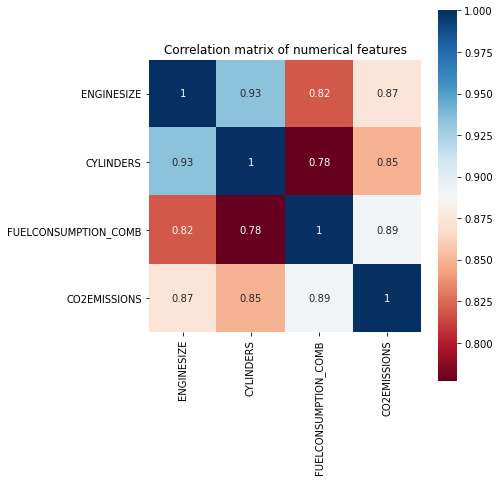

In [30]:
corr = sub_data.corr()
plt.subplots(figsize=(7,7));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

We can see that ENGINESIZE,CYLINDER,FUELCONSUMPTION_COMB are well correlated with CO2EMISSIONS

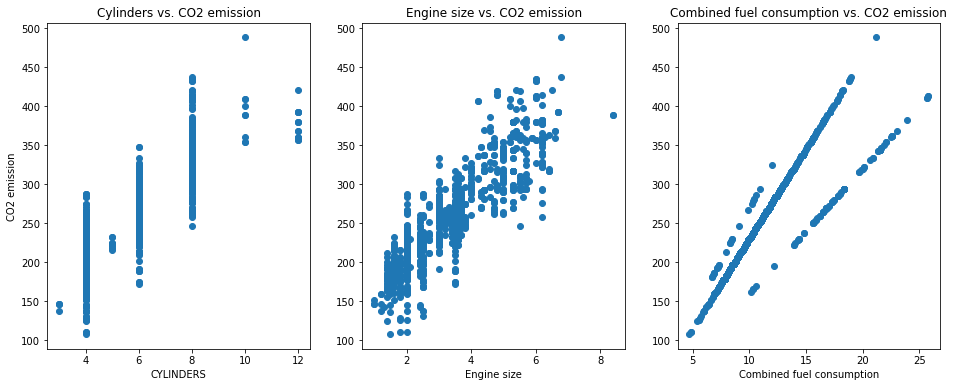

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].scatter(sub_data['CYLINDERS'], sub_data['CO2EMISSIONS'])
axes[0].set_title("Cylinders vs. CO2 emission")
axes[0].set_xlabel("CYLINDERS")
axes[0].set_ylabel("CO2 emission")

axes[1].scatter(sub_data['ENGINESIZE'], sub_data['CO2EMISSIONS'])
axes[1].set_title("Engine size vs. CO2 emission")
axes[1].set_xlabel("Engine size")

axes[2].scatter(sub_data['FUELCONSUMPTION_COMB'], sub_data['CO2EMISSIONS'])
axes[2].set_title("Combined fuel consumption vs. CO2 emission")
axes[2].set_xlabel("Combined fuel consumption")

plt.show()

All three features seem to have a linear relationship with CO2 emissions. All trends indicate a positive correlation.

* Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?

In [32]:
sub_data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [33]:
X = sub_data.drop('CO2EMISSIONS',axis=1)
# X = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB']]
y = sub_data['CO2EMISSIONS'].values.reshape(-1,1)

#### Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Train

In [35]:
from sklearn.linear_model import LinearRegression
reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)
print("The linear model is: Y = {:.3} + {:.3}*ENGINESIZE + {:.3}*CYLINDERS + {:.3}*FUELCONSUMPTION_COMB".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2]))

The linear model is: Y = 68.4 + 11.9*ENGINESIZE + 7.55*CYLINDERS + 9.1*FUELCONSUMPTION_COMB


### Assess the performance of your model. What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def assess_performance(y_true, y_pred):
    print("Mean square error (MSE): %.2f" % mean_squared_error(y_true, y_pred))
    print("Root mean square error (RMSE): %.2f" % mean_squared_error(y_true, y_pred, squared=False))
    print("Mean absolute error (MAE): %.2f" % mean_absolute_error(y_true, y_pred))
    print("R^2 score is: %.2f" % r2_score(y_true, y_pred))

In [37]:
y_pred = reg_multiple.predict(X_test)
assess_performance(y_test, y_pred)

Mean square error (MSE): 595.36
Root mean square error (RMSE): 24.40
Mean absolute error (MAE): 18.14
R^2 score is: 0.85


With FUELCONSUMPTION_COMB as a unique predictor, we had a mean squared error of 792.17. Here, with our three predictors, we get an MSE of 595.36. We have improved our prediction.
The Mean Absolute Error indicates that the average prediction error shrank from 20.22 to 18.14.
The  𝑅2  score indicates that adding two more features allowed the model to explain 85% of the variance, as opposed to 81% with only one predictor.

#### 'FUELCONSUMPTION_CITY' is the urban consumption while FUELCONSUMPTION_HWY is the consumption on the highway. 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' so to represent a standard driver behaviour. How are these three features correlated between each other?

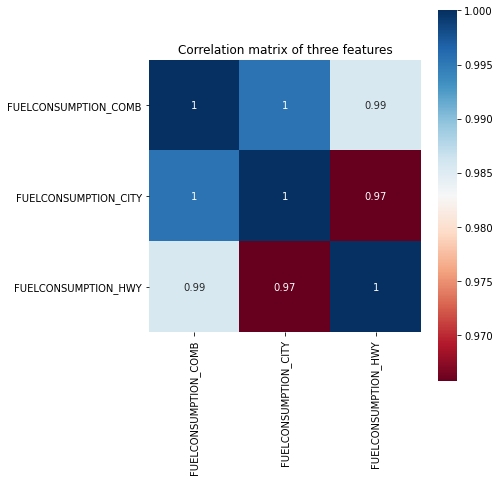

In [38]:
corr=data[['FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']].corr()
plt.subplots(figsize=(7,7));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of three features")
plt.tight_layout()
plt.show()

These three features are highly correlated between each other.Especially, FUELCONSUMPTION_COMB correlated at more than 98.5% with FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY.

#### Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?

In [41]:
X_1 = data[['FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CYLINDERS', 'ENGINESIZE']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)
#Slit
X_train_1, X_test_1, y_train, y_test = train_test_split(X_1, y, test_size = 0.25, random_state = 0)
#train
reg_multiple_1 = LinearRegression()
reg_multiple_1.fit(X_train_1, y_train)

# Model performance
y_pred_1 = reg_multiple_1.predict(X_test_1)
assess_performance(y_test, y_pred_1)

Mean square error (MSE): 597.46
Root mean square error (RMSE): 24.44
Mean absolute error (MAE): 18.14
R^2 score is: 0.85


The metrics are approximately the same as before. that means that there is no significant gain of accuracy when addding FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY as predictors.
This is due to the fact that these two features are strongly correlated with FUELCONSUMPTION_COMB and do not bring much extra information. Indeed, this latter is a linear combanation of the two previous ones. This is called a multicollinearity.

#### Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

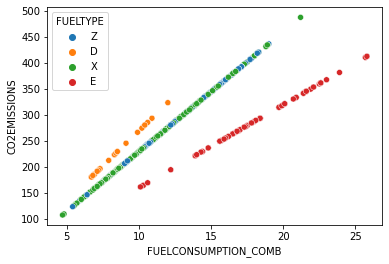

In [42]:
sns.scatterplot(data=data, x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", hue="FUELTYPE")

We can see that C02 emission increase linearly with FUELCONSUMPTION_COMB group by FUELTYPE. So, 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for CO2EMISSIONS estimation with a multiple linear regression model.

In [64]:
X_2 = data[['FUELCONSUMPTION_COMB','FUELTYPE']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

Encoder category FUELTYPE feature

In [70]:
from sklearn.preprocessing import OrdinalEncoder
X_2 = pd.get_dummies(X_2 , columns=['FUELTYPE'], prefix=['FUELTYPE_is'])
X_2.head(5)


,FUELCONSUMPTION_COMB,FUELTYPE_is_D,FUELTYPE_is_E,FUELTYPE_is_X,FUELTYPE_is_Z
0,8.5,0,0,0,1
1,9.6,0,0,0,1
2,5.9,0,0,0,1
3,11.1,0,0,0,1
4,10.6,0,0,0,1


In [72]:
#Split
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size = 0.25, random_state = 0)

In [73]:
#Scaling
#numerical_feature = ['FUELCONSUMPTION_COMB']

In [74]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_2.loc[:,numerical_feature] = scaler.fit_transform(X_train_2[numerical_feature])
#X_test_2.loc[:,numerical_feature] = scaler.transform(X_test_2[numerical_feature])
#X_train_2.head(6)

In [75]:
# Model fit
reg_multiple_2 = LinearRegression()
reg_multiple_2.fit(X_train_2, y_train)
# Model accuracy
y_pred_2 = reg_multiple_2.predict(X_test_2)
assess_performance(y_test, y_pred_2)

Mean square error (MSE): 51.45
Root mean square error (RMSE): 7.17
Mean absolute error (MAE): 3.41
R^2 score is: 0.99


With this model, the MSE has decreased from 597.46 to 51.45.It means that we have significatively increased the performance of the model. A more interpretable measure is the MAE, which has fallen from 18,14 to 3,41. Finally, the 𝑅2  score shows that the new model now explains 99% if the variance.

# Going further 
### Interpreting the model

In [82]:
def show_coefficients(model,feature_names=None):
    coefs = np.hstack([model.intercept_,model.coef_.squeeze()])
    feature_names =  model.feature_names_in_.tolist() if feature_names is None else feature_names.tolist()
    feature_names = ['Intercept'] + feature_names
    return pd.DataFrame(coefs, index=feature_names, columns=['coefficient'])

    
show_coefficients(reg_multiple_2)  

,coefficient
Intercept,-12.792545
FUELCONSUMPTION_COMB,22.124991
FUELTYPE_is_D,54.522828
FUELTYPE_is_E,-99.664178
FUELTYPE_is_X,22.079584
FUELTYPE_is_Z,23.061766


In [83]:
reg_multiple_2.feature_names_in_

array(['FUELCONSUMPTION_COMB', 'FUELTYPE_is_D', 'FUELTYPE_is_E',
       'FUELTYPE_is_X', 'FUELTYPE_is_Z'], dtype=object)

# Adding interaction ploynomial features

In [101]:
from sklearn.preprocessing import PolynomialFeatures

#Data preparation
X_3 = data[['FUELTYPE','FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)


In [102]:
X_3['FUELTYPE'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [103]:
# Data encoding
X_3 = pd.get_dummies(X_3, columns=['FUELTYPE'], prefix=['FUELTYPE_is'])
X_3['FUELTYPE_is_XZ'] = X_3['FUELTYPE_is_X'] | X_3['FUELTYPE_is_Z']
X_3 = X_3.drop(['FUELTYPE_is_X', 'FUELTYPE_is_Z'], axis='columns')
poly_3 = PolynomialFeatures(degree=2, include_bias=False)
X_3 = poly_3.fit_transform(X_3)


In [105]:
# Train-test split
X_train_3, X_test_3, y_train, y_test = train_test_split(X_3, y, test_size = 0.25, random_state = 0)

In [107]:
# Model fit
reg_multiple_3 = LinearRegression()
reg_multiple_3.fit(X_train_3, y_train)

LinearRegression()

In [108]:
# Model accuracy
y_pred_3 = reg_multiple_3.predict(X_test_3)
assess_performance(y_test, y_pred_3)

Mean square error (MSE): 0.09
Root mean square error (RMSE): 0.30
Mean absolute error (MAE): 0.25
R^2 score is: 1.00


In [109]:

show_coefficients(reg_multiple_3, feature_names=poly_3.get_feature_names_out())

,coefficient
Intercept,0.382765
FUELCONSUMPTION_COMB,16.455013
FUELTYPE_is_D,-0.003922
FUELTYPE_is_E,0.042632
FUELTYPE_is_XZ,-0.038710
FUELCONSUMPTION_COMB^2,0.002092
FUELCONSUMPTION_COMB FUELTYPE_is_D,10.483622
FUELCONSUMPTION_COMB FUELTYPE_is_E,-0.521465
FUELCONSUMPTION_COMB FUELTYPE_is_XZ,6.492857
FUELTYPE_is_D^2,-0.003922


## With only interaction terms

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Data preparation
X_5 = data[['FUELTYPE','FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

# Data encoding
X_5 = pd.get_dummies(X_5, columns=['FUELTYPE'], prefix=['FUELTYPE_is'])
X_5['FUELTYPE_is_XZ'] = X_5['FUELTYPE_is_X'] | X_5['FUELTYPE_is_Z']
X_5 = X_5.drop(['FUELTYPE_is_X', 'FUELTYPE_is_Z'], axis='columns')
poly_5 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_5 = poly_5.fit_transform(X_5)

# Train-test split
X_train_5, X_test_5, y_train, y_test = train_test_split(X_5, y, test_size = 0.25, random_state = 0)

# Model fit
reg_multiple_5 = Ridge()
reg_multiple_5.fit(X_train_5, y_train)

# Model accuracy
y_pred_5 = reg_multiple_5.predict(X_test_5)
assess_performance(y_test, y_pred_5)

Mean square error (MSE): 0.09
Root mean square error (RMSE): 0.30
Mean absolute error (MAE): 0.25
R^2 score is: 1.00


In [111]:
show_coefficients(reg_multiple_5, feature_names=poly_5.get_feature_names_out())

,coefficient
Intercept,0.290598
FUELCONSUMPTION_COMB,16.472892
FUELTYPE_is_D,0.615412
FUELTYPE_is_E,-0.366665
FUELTYPE_is_XZ,-0.248747
FUELCONSUMPTION_COMB FUELTYPE_is_D,10.419223
FUELCONSUMPTION_COMB FUELTYPE_is_E,-0.469722
FUELCONSUMPTION_COMB FUELTYPE_is_XZ,6.523391
FUELTYPE_is_D FUELTYPE_is_E,0.000000
FUELTYPE_is_D FUELTYPE_is_XZ,0.000000
